## Polymers Lab Python

In [3]:
import numpy as np
from scipy.optimize import curve_fit
from scipy import special
import scipy.stats as st
import math
from statistics import stdev
import glob
import pandas as pd
from skimage import io
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import seaborn as sns
sns.set()
from jupyterthemes import get_themes
import jupyterthemes as jt
import matplotlib.image as mpimg
from PIL import Image
import os
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('oceans16')


In [7]:
df = pd.read_excel('MATS24112 Measured data(1).xlsx')
pd.set_option("display.max_rows", 30, "display.max_columns", None)
df

,LDPE,Unnamed: 1,Unnamed: 2,HDPE,Unnamed: 4,Unnamed: 5,PS,Unnamed: 7,Unnamed: 8,HIPS,Unnamed: 10,Force,Unnamed: 12,Unnamed: 13,LDPE(converted),Unnamed: 15,HDPE(converted),Unnamed: 17,PS(converted),Unnamed: 19,HIPS(converted),Unnamed: 21
0,Length,Force,NaN,Length,Force,NaN,Length,Force,NaN,Length,Force,(kN),NaN,NaN,Strain (%),Stress (Mpa),Strain (%),Stress (Mpa),Strain (%),Stress (Mpa),Strain (%),Stress (Mpa)
1,(mm),(kN),NaN,(mm),(kN),NaN,(mm),(kN),NaN,(mm),(kN),0.00282895,NaN,NaN,0,-0.23055,NaN,NaN,NaN,NaN,NaN,NaN
2,120,-0.00874246,NaN,120,-0.0120074,NaN,120,0.0181168,NaN,120,0.00282895,0.00283868,NaN,NaN,0.000989999,-0.22693,NaN,NaN,NaN,NaN,NaN,NaN
3,120.001,-0.00860519,NaN,120.001,-0.0114784,NaN,120,0.0181491,NaN,120,0.00283868,0.0030821,NaN,,0.00474,-0.21777,NaN,NaN,NaN,NaN,NaN,NaN
4,120.006,-0.00825784,NaN,120.006,-0.00930815,NaN,120.001,0.0185404,NaN,120.001,0.0030821,0.00366753,NaN,NaN,0.00977999,-0.20591,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25994,NaN,NaN,NaN,336.589,0.324485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25995,NaN,NaN,NaN,336.597,0.324465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25996,NaN,NaN,NaN,336.605,0.32449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25997,NaN,NaN,NaN,336.614,0.324483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### LDPE

In [4]:
LDPE_strain=df["LDPE"].iloc[2:].dropna()
#print(LDPE_strain)
strain_LDPE=[]#percentage
for i in LDPE_strain:
    strain_LDPE.append(((i-120)/120)*100)
#print(strain_LDPE)

In [5]:
LDPE_stress=df["Unnamed: 1"].iloc[2:].dropna()
stress_LDPE=[]#MPa
for i in LDPE_stress:
    stress_LDPE.append(i/((37.92*10**-6)*10**3))
#print(stress_LDPE)

Ultimate strain = 69.99075%
Ultimate stress = 7.91561 MPa
Toughness = 7.033202159376999 MPa


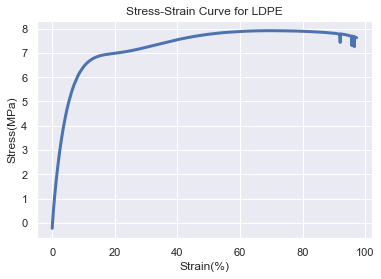

In [7]:
#print(len(strain_LDPE))
#print(len(stress_LDPE))
plt.plot(strain_LDPE,stress_LDPE, linewidth=3)
plt.xlabel('Strain(%)')
plt.ylabel('Stress(MPa)')
plt.title('Stress-Strain Curve for LDPE')
#last_strain_LDPE=str(strain_LDPE[-1:])[1:-1]
print('Ultimate strain = ' + str(strain_LDPE[(stress_LDPE.index(max(stress_LDPE)))])+'%')
print('Ultimate stress = ' + str(max(stress_LDPE))+' MPa')
result = np.trapz(stress_LDPE,strain_LDPE)
print('Toughness = ' + str(result/100)+ ' MPa')
#plt.savefig('LDPE')

#### Findind the Tensile modulus

We find the Initial modulus, select a very low strain% with its matching stress to find linear fit.

LDPE Tenslie modulus = 133.3934893351435 MPa
R^2= 0.9922266248929892


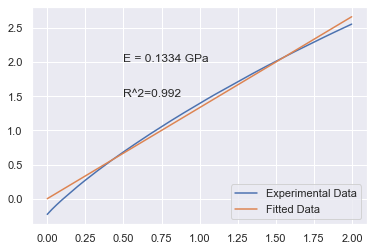

In [189]:
Ystrain_LDPE=np.array(strain_LDPE)
Ystrain_LDPE=Ystrain_LDPE[Ystrain_LDPE<2]
Ystress_LDPE=stress_LDPE[:len(Ystrain_LDPE)]

reg = LinearRegression(fit_intercept = False)
reg.fit(np.array(Ystrain_LDPE).reshape(-1, 1),np.array(Ystress_LDPE).reshape(-1, 1))
m=reg.coef_
E=m*100
yFit=np.squeeze(m*(Ystrain_LDPE))

a,=plt.plot(Ystrain_LDPE,Ystress_LDPE,label='Experimental Data')
b,=plt.plot(Ystrain_LDPE,yFit,label='Fitted Data')
plt.legend(handles=[a,b])
plt.legend(loc=4)
x_pos = 0.5
y_pos = 2
x_pos1 = 0.5
y_pos1 =1.5
plt.text(x_pos, y_pos, "E = 0.1334 GPa")
plt.text(x_pos1,y_pos1,'R^2=0.992')
print('LDPE Tenslie modulus = ' + str(E.item())+' MPa')
print('R^2= ' + str(reg.score(np.array(Ystrain_LDPE).reshape(-1, 1),np.array(Ystress_LDPE).reshape(-1, 1)).item()))
#plt.savefig('E(LDPE)')

### HDPE

Ultimate strain = 8.768539999999993%
Ultimate stress = 19.89501 MPa
Toughness = 20.954801901509498 MPa


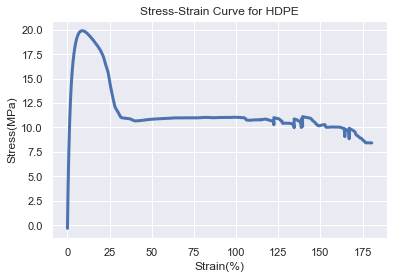

In [178]:
HDPE_strain=df["HDPE"].iloc[2:].dropna()
strain_HDPE=[]#MPa
#### Findind the Tensile modulus#### Findind the Tensile modulustrain
for i in HDPE_strain:
    strain_HDPE.append(((i-120)/120)*100)
#print(stress_HDPE)
HDPE_stress=df["Unnamed: 4"].iloc[2:].dropna()
#print(LDPE_strain)
stress_HDPE=[]#percentage
for i in HDPE_stress:
    stress_HDPE.append(i/((38.50*10**-6)*10**3))
#print(stress_LDPE)
plt.plot(strain_HDPE,stress_HDPE,linewidth=3)
plt.xlabel('Strain(%)')
plt.ylabel('Stress(MPa)')
plt.title('Stress-Strain Curve for HDPE')
print('Ultimate strain = ' + str(strain_LDPE[(stress_HDPE.index(max(stress_HDPE)))])+'%')
print('Ultimate stress = ' + str(max(stress_HDPE))+' MPa')
result1 = np.trapz(stress_HDPE,strain_HDPE)
print('Toughness = ' + str(result1/100)+ ' MPa')
#plt.savefig('HDPE')

#### Findind the Tensile modulus

LDPE Tenslie modulus = 949.2427153414322 MPa
R^2= 0.9859664827980488


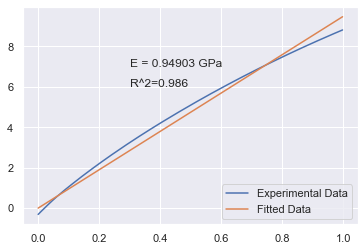

In [188]:
#Ystrain_HDPE=[i for i in strain_HDPE if i<1]
#Ystress_HDPE=stress_HDPE[:len(Ystrain_HDPE)]
Ystrain_HDPE=np.array(strain_HDPE)
Ystrain_HDPE=Ystrain_HDPE[Ystrain_HDPE<1]
Ystress_HDPE=stress_HDPE[:len(Ystrain_HDPE)]

reg = LinearRegression(fit_intercept = False)
reg.fit(np.array(Ystrain_HDPE).reshape(-1, 1),np.array(Ystress_HDPE).reshape(-1, 1))
m=reg.coef_
E=m*100
yFit=np.squeeze(m*(Ystrain_HDPE))

a,=plt.plot(Ystrain_HDPE,Ystress_HDPE,label='Experimental Data')
b,=plt.plot(Ystrain_HDPE,yFit,label='Fitted Data')
plt.legend(handles=[a,b])
plt.legend(loc=4)
x_pos = 0.3
y_pos = 7
x_pos1 = 0.3
y_pos1 =6
plt.text(x_pos, y_pos, "E = 0.94903 GPa")
plt.text(x_pos1,y_pos1, 'R^2=0.986')
print('LDPE Tenslie modulus = ' + str(E.item())+' MPa')
print('R^2= ' + str(reg.score(np.array(Ystrain_HDPE).reshape(-1, 1),np.array(Ystress_HDPE).reshape(-1, 1)).item()))
#plt.savefig('E(HDPE)')

### PS

Ultimate strain = 1.4236500000000045%
Ultimate stress = 37.22657 MPa
Toughness = 0.3019741422759983 MPa


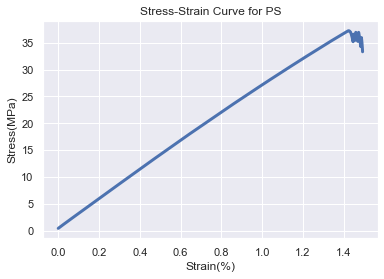

In [16]:
PS_strain=df["PS"].iloc[2:].dropna()
strain_PS=[]#MPa
for i in PS_strain:
    strain_PS.append(((i-120)/120)*100)
#print(stress_HDPE)
PS_stress=df["Unnamed: 7"].iloc[2:].dropna()
#print(LDPE_strain)
stress_PS=[]#percentage
for i in PS_stress:
    stress_PS.append(i/((41.94*10**-6)*10**3))
#print(stress_LDPE)
plt.plot(strain_PS,stress_PS,linewidth=3)
plt.xlabel('Strain(%)')
plt.ylabel('Stress(MPa)')
plt.title('Stress-Strain Curve for PS')
print('Ultimate strain = ' + (str(strain_PS[(stress_PS.index(max(stress_PS)))])+'%'))#Also yield
print('Ultimate stress = ' + str(max(stress_PS))+' MPa')#Also yield
result2 = np.trapz(stress_PS,strain_PS)
print('Toughness = ' + str(result2/100)+ ' MPa')
#plt.savefig('PS')

#### Findind the Tensile modulus

PS Tenslie modulus = 2738.792930824831 MPa
R^2= 0.9978648259811552


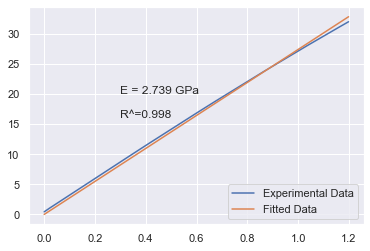

In [191]:
#Ystrain_PS=[i for i in strain_PS if i<1.2]
#Ystress_PS=stress_PS[:len(Ystrain_PS)]
Ystrain_PS=np.array(strain_PS)
Ystrain_PS=Ystrain_PS[Ystrain_PS<1.2]
Ystress_PS=stress_PS[:len(Ystrain_PS)]

reg = LinearRegression(fit_intercept = False)
reg.fit(np.array(Ystrain_PS).reshape(-1, 1),np.array(Ystress_PS).reshape(-1, 1))
m=reg.coef_
E=m*100
yFit=np.squeeze(m*(Ystrain_PS))

a,=plt.plot(Ystrain_PS,Ystress_PS,label='Experimental Data')
b,=plt.plot(Ystrain_PS,yFit,label='Fitted Data')
plt.legend(handles=[a,b])
plt.legend(loc=4)
x_pos = 0.3
y_pos = 20
x_pos1=0.3
y_pos1=16
plt.text(x_pos, y_pos, "E = 2.739 GPa")
plt.text(x_pos1,y_pos1, 'R^=0.998')
print('PS Tenslie modulus = ' + str(E.item())+' MPa')
print('R^2= ' + str(reg.score(np.array(Ystrain_PS).reshape(-1, 1),np.array(Ystress_PS).reshape(-1, 1)).item()))
#plt.savefig('E(PS)')

### HIPS

Ultimate strain = 1.0126199999999959%
Ultimate stress = 18.613319999999998 MPa
Toughness = 3.3271499707430015 MPa


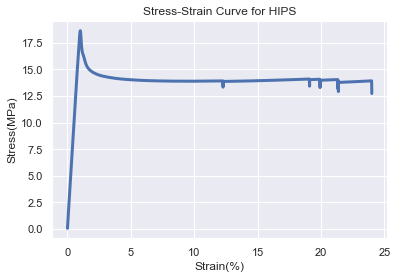

In [17]:
HIPS_strain=df["HIPS"].iloc[2:].dropna()
strain_HIPS=[]#MPa
for i in HIPS_strain:
    strain_HIPS.append(((i-120)/120)*100)
#print(stress_HDPE)
HIPS_stress=df["Unnamed: 10"].iloc[2:].dropna()
#print(LDPE_strain)
stress_HIPS=[]#percentage
for i in HIPS_stress:
    stress_HIPS.append(i/((40.57*10**-6)*10**3))
#print(stress_LDPE)
plt.plot(strain_HIPS,stress_HIPS,linewidth=3)
plt.xlabel('Strain(%)')
plt.ylabel('Stress(MPa)')
plt.title('Stress-Strain Curve for HIPS')
print('Ultimate strain = ' + (str(strain_HIPS[(stress_HIPS.index(max(stress_HIPS)))])+ '%'))
print('Ultimate stress = ' + str(max(stress_HIPS))+' MPa')
result3 = np.trapz(stress_HIPS,strain_HIPS)
print('Toughness = ' + str(result3/100)+ ' MPa')
#plt.savefig('HIPS')

#### Findind the Tensile modulus

HIPS Tenslie modulus = 1949.6664955615788 MPa
R^2= 0.9995817214015823


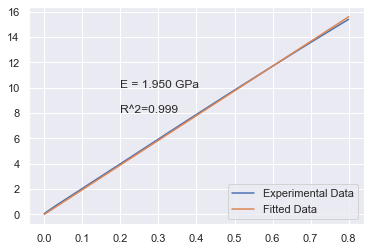

In [194]:
Ystrain_HIPS=np.array(strain_HIPS)
Ystrain_HIPS=[i for i in strain_HIPS if i<0.8]
Ystress_HIPS=stress_HIPS[:len(Ystrain_HIPS)]

reg = LinearRegression(fit_intercept = False)
reg.fit(np.array(Ystrain_HIPS).reshape(-1, 1),np.array(Ystress_HIPS).reshape(-1, 1))
m=reg.coef_
E=m*100
yFit=np.squeeze(m*(Ystrain_HIPS))

a,=plt.plot(Ystrain_HIPS,Ystress_HIPS,label='Experimental Data')
b,=plt.plot(Ystrain_HIPS,yFit,label='Fitted Data')
plt.legend(handles=[a,b])
plt.legend(loc=4)
x_pos = 0.2
y_pos = 10
x_pos1=0.2
y_pos1=8
plt.text(x_pos, y_pos, "E = 1.950 GPa")
plt.text(x_pos1,y_pos1, 'R^2=0.999')
print('HIPS Tenslie modulus = ' + str(E.item())+' MPa')
print('R^2= ' + str(reg.score(np.array(Ystrain_HIPS).reshape(-1, 1),np.array(Ystress_HIPS).reshape(-1, 1)).item()))
#plt.savefig('E(HIPS)')